In [671]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [672]:
df = pd.read_csv("/content/HRDataset_v14.csv",
                 parse_dates= True, dayfirst= True)

In [673]:
df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,DateofHire,DateofHire.1,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07-10-1983,M,Single,US Citizen,No,07-05-2011,08-05-2011,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05-05-1975,M,Married,US Citizen,No,3/30/2015,3/30/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,07-05-2011,08-05-2011,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,01-07-2008,02-07-2008,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09-08-1989,F,Divorced,US Citizen,No,07-11-2011,08-11-2011,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [675]:
# We have some columns with dates in them, namely DoB, two DateofHire columns, and LastPerformanceReviewDate
# The biggest problem with these columns isn't that they aren't in the datetime format, it's that there are
# mixed formats in them; DD-MM-YY and MM/DD/YYYY. We fix this by converting them to datetime and setting
# dayfirst as True
df['LastPerformanceReview_Date'].head(20)

0      1/17/2019
1      2/24/2016
2      5/15/2012
3     01-03-2019
4     02-01-2016
5     01-07-2019
6     01-02-2019
7      2/25/2019
8      1/25/2019
9      2/18/2019
10     1/30/2016
11    05-06-2016
12     2/25/2019
13     2/14/2019
14    03-02-2017
15    04-05-2017
16     1/14/2019
17     1/14/2019
18     1/15/2015
19    01-11-2019
Name: LastPerformanceReview_Date, dtype: object

In [676]:
df['DOB']= pd.to_datetime(df['DOB'], dayfirst= True)
df['DateofHire']= pd.to_datetime(df['DateofHire'], dayfirst= True)
df['DateofHire.1']= pd.to_datetime(df['DateofHire.1'], dayfirst= True)
df['LastPerformanceReview_Date']= pd.to_datetime(
    df['LastPerformanceReview_Date'], dayfirst= True)

In [677]:
# Let's get a grasp of the most recent year of this dataset:
df['LastPerformanceReview_Date'].max()

Timestamp('2019-12-02 00:00:00')

In [678]:
df.isna().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
DateofHire                    0
DateofHire.1                  0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialP

In [679]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'DateofHire',
       'DateofHire.1', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [680]:
# I am choosing to mainly focus on the three columns Salary, Performance Score and Employee Satisfaction and see how all of the other columns affect these three
# measures and make inferences from that

In [681]:
df_categorical = df[['Position', 'Sex', 'MaritalDesc', 'CitizenDesc',
                     'HispanicLatino', 'Department', 'RecruitmentSource']]

In [682]:
df.Sex.value_counts()

F     176
M     135
Name: Sex, dtype: int64

In [683]:
# How is salary split between the sexes?
# What about Employee Satisfaction?
# The people with the most power; are they male or female?

In [684]:
df.CitizenDesc.value_counts()

US Citizen             295
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64

In [685]:
df.State.value_counts()

MA    276
CT      6
TX      3
VT      2
UT      1
AZ      1
ND      1
OR      1
MT      1
NV      1
ID      1
KY      1
NC      1
FL      1
GA      1
CO      1
NY      1
PA      1
RI      1
NH      1
TN      1
IN      1
OH      1
CA      1
WA      1
AL      1
VA      1
ME      1
Name: State, dtype: int64

In [686]:
# Are the non-US Citizens of the company doing well work wise? Not too interesting, maybe drop if I get
# too much other that is interesting

In [687]:
df.MaritalDesc.value_counts()

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

In [688]:
# My guess here is that the single people will be the ones that earn the most and are also the most satisfied with their working conditions

In [689]:
df.HispanicLatino.value_counts()

No     282
Yes     27
no       1
yes      1
Name: HispanicLatino, dtype: int64

In [690]:
# We need to fix this
df['HispanicLatino'].replace({'no':'No', 'yes':'Yes'}, inplace=True)
df.HispanicLatino.value_counts()

No     283
Yes     28
Name: HispanicLatino, dtype: int64

In [691]:
# Let's look at the overlap between the Hispanic Latino people of the company and their Citizenship
df[df['HispanicLatino'] == 'Yes'].CitizenDesc.value_counts()

US Citizen             27
Eligible NonCitizen     1
Name: CitizenDesc, dtype: int64

In [692]:
# Meaning that out of the 28 Hispanic Latino workers of the company, all but one are also US Citizens. That is good, I guess?

In [693]:
df.TermReason.value_counts()

N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: TermReason, dtype: int64

In [694]:
# QUESTION: What made these 14 people so unhappy that they decided to terminate their contracts??

In [695]:
df.EmpSatisfaction.value_counts()

3    108
5     98
4     94
2      9
1      2
Name: EmpSatisfaction, dtype: int64

In [696]:
df.EmploymentStatus.value_counts()

Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64

In [697]:
# There really is no insightful inference we can make from this. We know that there is 207 active workers and from the non-active ones, the most interesting termination cause is Unhappy
# We can thus remove this column later

In [698]:
df.Department.value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [699]:
# Here we could look at the Salary, Performance score and Employee Satisfaction across the departments and try to make some inference from that
# My guess is that the people in Sales will the ones that are paid the least and are also the unhappiest along with the people in Production

In [700]:
df.RecruitmentSource.value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

In [701]:
# QUESTION: What does the Recruitement source predict about performance, salary and employee satisfaction?
# The one person that applied from the Online Web application; how is he/she doing at the company?

In [702]:
df.PerformanceScore.value_counts()

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64

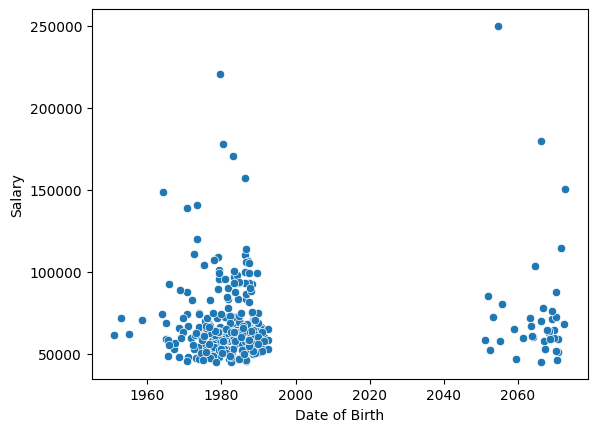

In [703]:
# This is something that I noticed when working at a later part in the notebook
# when looking at the unhappiest people initially. Putting it here retroactively
# because it raises the question "Should we remove these data points?"
# I ultimately decided not to because 1. It would remove the CEO and 2. Looking
# at one of the data points separately (down below with df.iloc[16]), the only
# thing that is unreasonable is the Date of Birth so they are still valuable
# data points
# I want to believe that this isn't deliberate and just rather incompetent people
# entering the data
ax = sns.scatterplot(x= 'DOB', y= 'Salary', data= df)
ax.set_xlabel('Date of Birth')
plt.show()

In [704]:
count = 0
for n in range(311):
  if df.iloc[n].DOB.year > 2000:
    print(n)
    count += 1
print(f"Count: {count}")

16
17
20
21
24
25
31
35
40
61
68
69
89
98
103
108
111
124
127
131
140
142
143
150
155
185
191
197
225
226
240
257
263
273
277
282
287
296
Count: 38


In [705]:
df.iloc[16]

Employee_Name                         Beak, Kimberly  
EmpID                                            10023
MarriedID                                            1
MaritalStatusID                                      1
GenderID                                             0
EmpStatusID                                          2
DeptID                                               5
PerfScoreID                                          4
FromDiversityJobFairID                               0
Salary                                           70131
Termd                                                0
PositionID                                          20
Position                      Production Technician II
State                                               MA
Zip                                               2145
DOB                                2066-04-17 00:00:00
Sex                                                  F
MaritalDesc                                    Married
CitizenDes

In [706]:
# df = df[df['DOB'] < '2000-01-01']
# df.info()
# Intentionally choosing not to do this

In [707]:
# The one and only data point that I will Date of Birth for is the CEO;
# from 2054 to 1954:
df.loc[150, "DOB"] = '1954-09-21 00:00:00'

In [708]:
df.loc[150]

Employee_Name                         King, Janet
EmpID                                       10089
MarriedID                                       1
MaritalStatusID                                 1
GenderID                                        0
EmpStatusID                                     1
DeptID                                          2
PerfScoreID                                     3
FromDiversityJobFairID                          0
Salary                                     250000
Termd                                           0
PositionID                                     16
Position                          President & CEO
State                                          MA
Zip                                          1902
DOB                           1954-09-21 00:00:00
Sex                                             F
MaritalDesc                               Married
CitizenDesc                            US Citizen
HispanicLatino                                Yes


In [709]:
grouped_by_gender_and_department = df.groupby(["Sex", "Department"])
grouped_by_gender_and_department["Position"].apply(pd.Series.value_counts)

Sex  Department                                        
F    Admin Offices         Administrative Assistant         3
                           Sr. Accountant                   2
                           Accountant I                     1
     Executive Office      President & CEO                  1
     IT/IS                 IT Support                       5
                           Database Administrator           4
                           Data Analyst                     3
                           Sr. Network Engineer             2
                           Network Engineer                 2
                           Sr. DBA                          1
                           Senior BI Developer              1
                           BI Developer                     1
                           Principal Data Architect         1
                           Data Architect                   1
                           CIO                              1
     Productio

In [710]:
fig = px.sunburst(df, path=['Sex', 'Department', 'RecruitmentSource'],
                  values= 'Salary', width=700, height=600)
fig.update_traces(textinfo="label+value")
fig.show()

In [711]:
# We realize immediately that columns like Employee name, Employee ID etc will be rather irrelevant
# to any inference or insightful exploration of our dataset and hence, we can create a new dataset with only
# the columns we're interested in. Furthermore, since there are columns with categorical values rather than
# ID's for Gender, Performance score and Marital status, we can remove the ID's of these as well
# Removing DateofHite.1 since I don't really know what it means
# I am also making the decision that columns such as State, EmploymentStatus, Manager Name, Engagement Survey
# are not going to give any good inference or insights, hence removing these

In [712]:
df = df[['Salary', 'Position', 'DOB', 'Sex', 'MaritalDesc',
         'CitizenDesc','HispanicLatino', 'DateofHire', 'TermReason',
         'Department', 'RecruitmentSource', 'PerformanceScore',
         'EmpSatisfaction', 'SpecialProjectsCount',
         'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']]

In [713]:
df.Salary.describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [714]:
# First, let's just get a good look and understanding of these three separately; their count and distributions

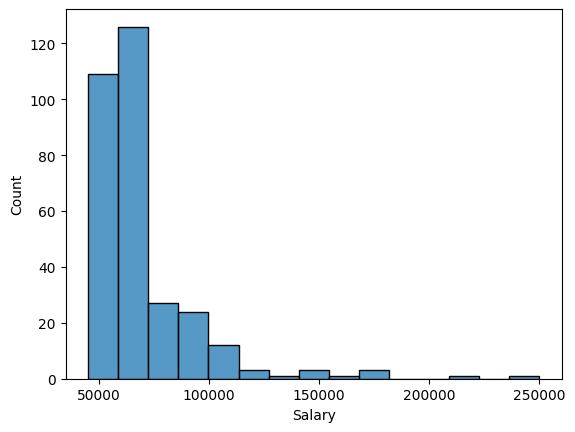

In [715]:
ax = sns.histplot(df['Salary'], kde= False, bins=15, edgecolor= 'black')
plt.show()

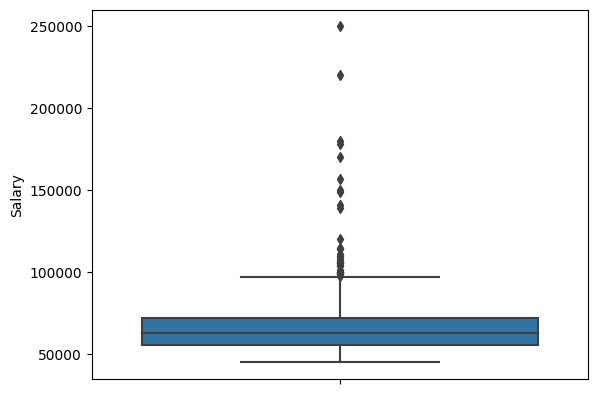

In [716]:
ax = sns.boxplot(y="Salary", data=df)
#plt.legend(loc='right')
plt.show()

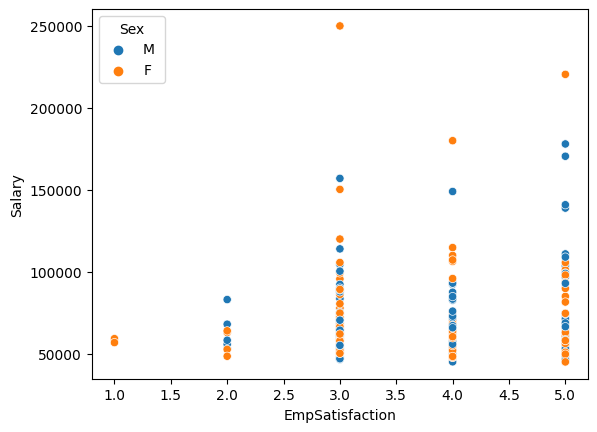

In [717]:
ax = sns.scatterplot(x= 'EmpSatisfaction', y= 'Salary', data= df, hue= 'Sex')
plt.show()

In [718]:
# Is the avarage salary higher for men or women?
# What do all the highest paid workers have in common?

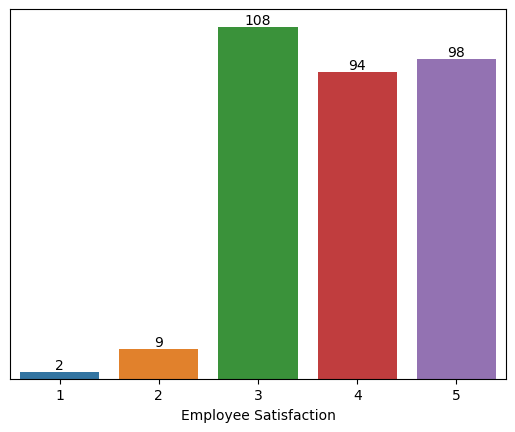

In [719]:
ax = sns.countplot(x='EmpSatisfaction', data=df)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Employee Satisfaction', ylabel=None, yticks=[])
plt.show()

In [720]:
# What do all 5 star satisfied workers have in common?
# What does it look like between the sexes?

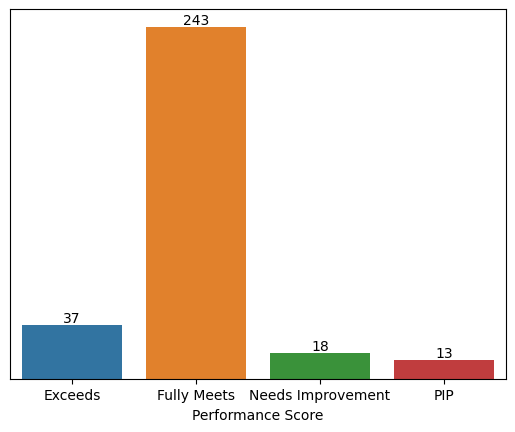

In [721]:
ax = sns.countplot(x='PerformanceScore', data=df)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Performance Score', ylabel=None, yticks=[])
plt.show()

In [722]:
# What do all workers who are exceeding in their work have in common?
# What does it look like between the sexes?

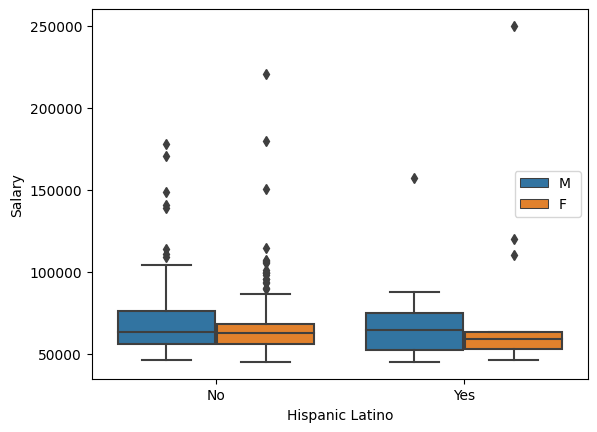

In [723]:
ax = sns.boxplot(x="HispanicLatino", y="Salary", hue="Sex", data=df)
ax.set(xlabel='Hispanic Latino')
plt.legend(loc='right')
plt.show()

In [724]:
df_without_executive_office = df[df['Department'] != 'Executive Office']
df_without_executive_office.Department.value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Name: Department, dtype: int64

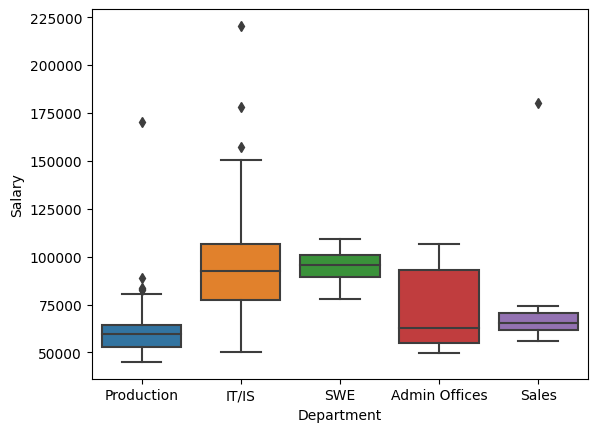

In [725]:
df_without_executive_office = df[df['Department'] != 'Executive Office']
ax = sns.boxplot(x="Department", y="Salary", data=df_without_executive_office)
ax.set_xticklabels(['Production', 'IT/IS', 'SWE', 'Admin Offices','Sales'])
plt.show()

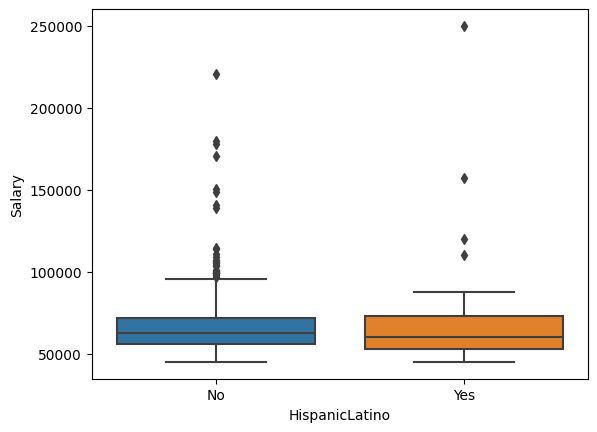

In [726]:
ax = sns.boxplot(x="HispanicLatino", y="Salary", data=df)
plt.show()

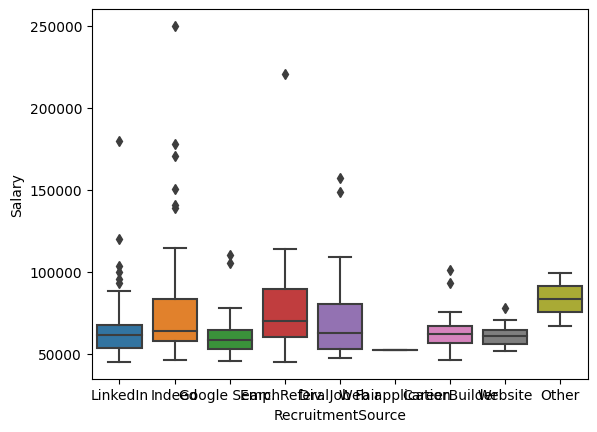

In [727]:
ax = sns.boxplot(x="RecruitmentSource", y="Salary", data=df)
ax.set_xticklabels(['LinkedIn', 'Indeed', 'Google Search',
                    'Emp. Referal', 'Div. Job Fair', 'Web application',
                    'CareerBuilder', 'Website', 'Other'])
plt.show()

In [728]:
# Men have a slightly higher average salary. All information in this box plot can be shown via:

In [729]:
grouped_by_gender = df.groupby("Sex")
grouped_by_gender["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,176.0,67786.727273,25805.669834,45046.0,55397.5,62066.5,68238.25,250000.0
M,135.0,70629.400000,24285.293173,45115.0,55650.0,63353.0,75655.00,178000.0


In [730]:
# The President and CEO is a female!
# Plot this with plotly express?

In [731]:
high_earners = df[df['Salary'] > 120000]

In [732]:
high_earners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 55 to 308
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Salary                      10 non-null     int64         
 1   Position                    10 non-null     object        
 2   DOB                         10 non-null     datetime64[ns]
 3   Sex                         10 non-null     object        
 4   MaritalDesc                 10 non-null     object        
 5   CitizenDesc                 10 non-null     object        
 6   HispanicLatino              10 non-null     object        
 7   DateofHire                  10 non-null     datetime64[ns]
 8   TermReason                  10 non-null     object        
 9   Department                  10 non-null     object        
 10  RecruitmentSource           10 non-null     object        
 11  PerformanceScore            10 non-null     object        

In [733]:
fig = px.sunburst(high_earners,
                  path=['Sex', 'MaritalDesc',
                        'RecruitmentSource', 'Department'],
                  width=700, height=600)
fig.update_traces(textinfo="label+value")
fig.show()

In [734]:
# This is super interesting!! From the 10 highest paid people at the company we can see that:
# Not a single software engineer! The majority of these people are in IT/IS
# The CEO of the company is not only female and hispanic latino, she is also married!
# The 4 single males have all also been recruited through Indeed! The rest are
# from the diversity job fair

In [735]:
high_earners[high_earners['DOB'] > '2000-01-01']
# The following two people won't be shown in the plot below

,Salary,Position,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,DateofHire,TermReason,Department,RecruitmentSource,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
131,180000,Director of Sales,2066-03-17,F,Married,US Citizen,No,2014-05-05,N/A-StillEmployed,Sales,LinkedIn,Fully Meets,4,0,2019-01-21,0,19
240,150290,Data Architect,2072-11-21,F,Single,US Citizen,No,2017-07-01,N/A-StillEmployed,IT/IS,Indeed,Fully Meets,3,5,2019-06-02,0,17


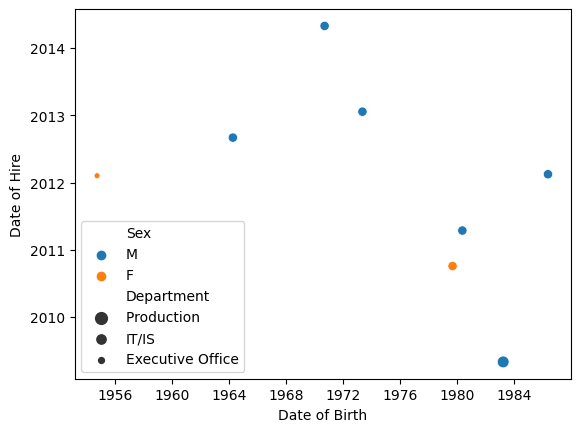

In [736]:
ax = sns.scatterplot(x= 'DOB', y= 'DateofHire',
                     data= high_earners[high_earners['DOB'] < '2000-01-01'],
                     hue= 'Sex', size= 'Department')
ax.set_xlabel('Date of Birth')
ax.set_ylabel('Date of Hire')
plt.legend(loc='lower left')
plt.show()

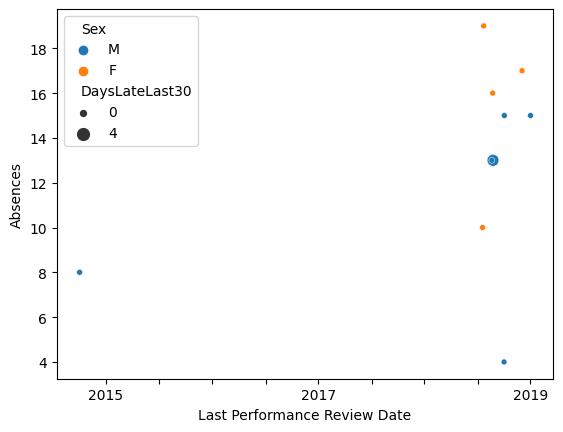

In [737]:
ax = sns.scatterplot(x= 'LastPerformanceReview_Date', y= 'Absences',
                     data= high_earners, hue= 'Sex',
                     size= 'DaysLateLast30')
ax.set_xlabel('Last Performance Review Date')
ax.set_xticklabels(['2015', None, None, None,
                   '2017', None, None, None, '2019'])
plt.show()

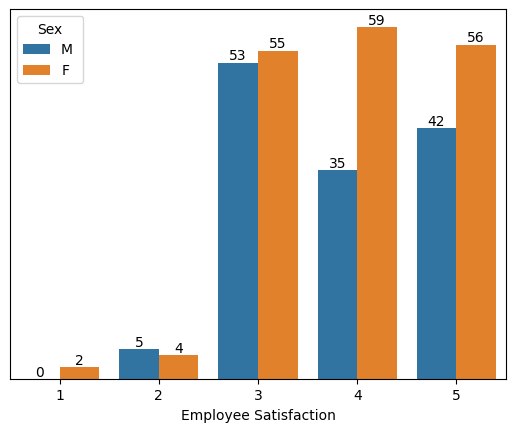

In [738]:
ax = sns.countplot(x='EmpSatisfaction', data=df, hue= "Sex")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set(xlabel='Employee Satisfaction', ylabel=None, yticks=[])
plt.show()

In [739]:
# It can also simply because we have more females working at the company. We have a total of 176 females and 135 males
# What about the people in power? What is the distribution male/female here?

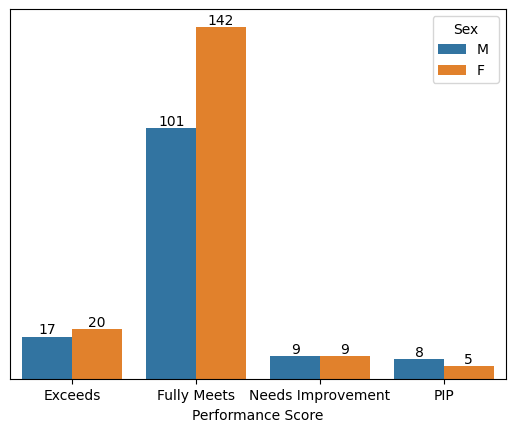

In [740]:
ax = sns.countplot(x='PerformanceScore', data=df, hue= "Sex")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set(xlabel='Performance Score', ylabel=None, yticks=[])
plt.show()

In [741]:
# Let's see real quick the relationship between the people with 5 star satisfaction and their performance score
df[df['EmpSatisfaction'] == 5].PerformanceScore.value_counts()

Fully Meets          77
Exceeds              15
Needs Improvement     4
PIP                   2
Name: PerformanceScore, dtype: int64

In [742]:
# This is really interesting! To have maximum enjoyment and satisfaction of your work, you don't need to exceed performance expectation!
# Let's look at it from the other side; out of the people who are actually exceeding their performance expectations, how does their satisfaction levels look like?
df[df['PerformanceScore'] == 'Exceeds'].EmpSatisfaction.value_counts()

5    15
4    11
3    11
Name: EmpSatisfaction, dtype: int64

In [743]:
# Interesting! One would almost expect the ones that are exceeding their work expectations to be miserable and burned out but the majority of these people are actually
# also very satisfied in their job! Indicating perhaps at a very fruitful and excellent working environment?
# Both of these two above can bee shown graphically as:

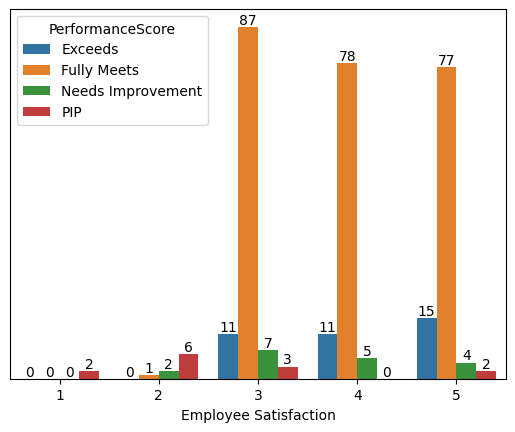

In [744]:
ax = sns.countplot(x='EmpSatisfaction', data=df, hue= "PerformanceScore")
for i in range(4):
  ax.bar_label(ax.containers[i])
ax.set(xlabel='Employee Satisfaction', ylabel=None, yticks=[])
plt.show()

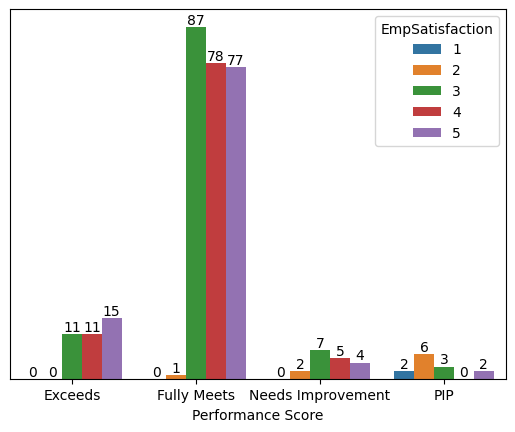

In [745]:
ax = sns.countplot(x='PerformanceScore', data=df, hue= "EmpSatisfaction")
for i in range(5):
  ax.bar_label(ax.containers[i])
ax.set(xlabel='Performance Score', ylabel=None, yticks=[])
plt.show()

In [746]:
# Let's look at these 15 happy high performers! What do they have in common?

In [747]:
happy_high_performers = df.loc[(df['PerformanceScore'] == 'Exceeds') & (df['EmpSatisfaction'] == 5)]

In [748]:
happy_high_performers.head(5)

,Salary,Position,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,DateofHire,TermReason,Department,RecruitmentSource,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,62506,Production Technician I,1983-10-07,M,Single,US Citizen,No,2011-05-07,N/A-StillEmployed,Production,LinkedIn,Exceeds,5,0,2019-01-17,0,1
5,57568,Production Technician I,1977-05-22,F,Single,US Citizen,No,2012-09-01,N/A-StillEmployed,Production,LinkedIn,Exceeds,5,0,2019-07-01,0,15
55,170500,Director of Operations,1983-03-19,M,Single,US Citizen,No,2009-05-01,N/A-StillEmployed,Production,Indeed,Exceeds,5,0,2019-04-02,0,15
76,138888,IT Manager - Support,1970-09-07,M,Single,US Citizen,No,2014-05-01,N/A-StillEmployed,IT/IS,Indeed,Exceeds,5,5,2019-04-01,0,4
77,74241,Area Sales Manager,1988-08-11,F,Single,US Citizen,No,2011-10-01,N/A-StillEmployed,Sales,Indeed,Exceeds,5,0,2019-01-27,0,14


In [749]:
happy_high_performers["Salary"].describe()

count        15.000000
mean      98268.266667
std       54288.791209
min       46738.000000
25%       58238.500000
50%       74241.000000
75%      123937.500000
max      220450.000000
Name: Salary, dtype: float64

In [750]:
high_earners["Salary"].describe()

count        10.000000
mean     173504.700000
std       36207.353955
min      138888.000000
25%      149321.750000
50%      163750.000000
75%      179500.000000
max      250000.000000
Name: Salary, dtype: float64

In [751]:
happy_high_performers["DaysLateLast30"].value_counts()

0    15
Name: DaysLateLast30, dtype: int64

In [752]:
# Let's clean this dataset a bit and then look at some scatter plots
# Let's first see if all of these 15 people are US Citizens and not Hispanic Latino. If that is the case, we can remove both of these columns
happy_high_performers['CitizenDesc'].value_counts()

US Citizen    15
Name: CitizenDesc, dtype: int64

In [753]:
happy_high_performers['HispanicLatino'].value_counts()

No    15
Name: HispanicLatino, dtype: int64

In [754]:
# I believe it's also safe to assume that all of these 15 people are still employed
happy_high_performers['TermReason'].value_counts()

N/A-StillEmployed                   11
Another position                     1
more money                           1
maternity leave - did not return     1
gross misconduct                     1
Name: TermReason, dtype: int64

In [755]:
# Okay so we do have to note that three people have left the company for various reasons

In [756]:
happy_high_performers['SpecialProjectsCount'].value_counts()

0    9
5    3
3    1
7    1
6    1
Name: SpecialProjectsCount, dtype: int64

In [757]:
happy_high_performers['Sex'].value_counts()

M     8
F     7
Name: Sex, dtype: int64

In [758]:
# Okay so all of these people are US Citizens and none of them are Hispanic Latino
# Furthermore none of them have been late in the last 30 days, which makes a lot of sense!
# That's the first three things that they all have in common
# We can also remove the PerformanceScore and EmpSatisfaction columns since we know these values
# Let's remove these columns
happy_high_performers.drop(['CitizenDesc', 'HispanicLatino', 'DaysLateLast30',
                            'PerformanceScore', 'EmpSatisfaction'],
                           axis=1, inplace=True)

In [759]:
happy_high_performers.head(5)

,Salary,Position,DOB,Sex,MaritalDesc,DateofHire,TermReason,Department,RecruitmentSource,SpecialProjectsCount,LastPerformanceReview_Date,Absences
0,62506,Production Technician I,1983-10-07,M,Single,2011-05-07,N/A-StillEmployed,Production,LinkedIn,0,2019-01-17,1
5,57568,Production Technician I,1977-05-22,F,Single,2012-09-01,N/A-StillEmployed,Production,LinkedIn,0,2019-07-01,15
55,170500,Director of Operations,1983-03-19,M,Single,2009-05-01,N/A-StillEmployed,Production,Indeed,0,2019-04-02,15
76,138888,IT Manager - Support,1970-09-07,M,Single,2014-05-01,N/A-StillEmployed,IT/IS,Indeed,5,2019-04-01,4
77,74241,Area Sales Manager,1988-08-11,F,Single,2011-10-01,N/A-StillEmployed,Sales,Indeed,0,2019-01-27,14


In [760]:
# The most interesting categorical columns: Sex, MaritalDesc, Department, RecruitmentSource
# The most interesting numerical columns: Salary, DOB, DateofHire, SpecialProjectsCount,
# LastPerformanceReview_Date, Absences

In [761]:
fig = px.sunburst(happy_high_performers,
                  path=['Sex', 'MaritalDesc',
                        'RecruitmentSource', 'Department'],
                  width=700, height=600)
fig.update_traces(textinfo="label+value")
fig.show()

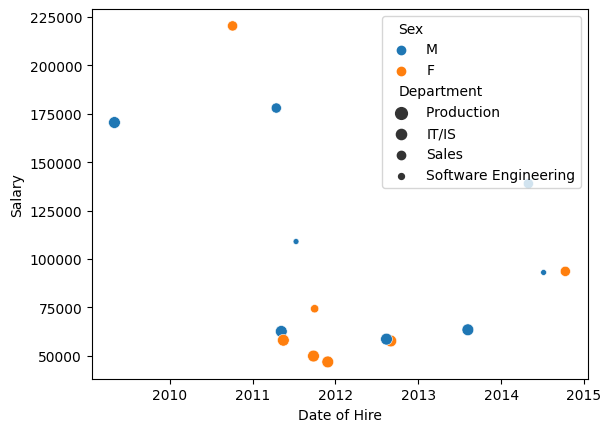

In [762]:
ax = sns.scatterplot(x= 'DateofHire', y= 'Salary', data= happy_high_performers,
                hue= 'Sex', size= 'Department')
ax.set_xlabel('Date of Hire')
plt.show()

In [763]:
# So the most recent addition of these happy high performers have still have been at the company for
# just over 3 years. All of them are still hired at the company (one of them moved to another position)
# except for 3 people that had stayed for the company between 5-7 years

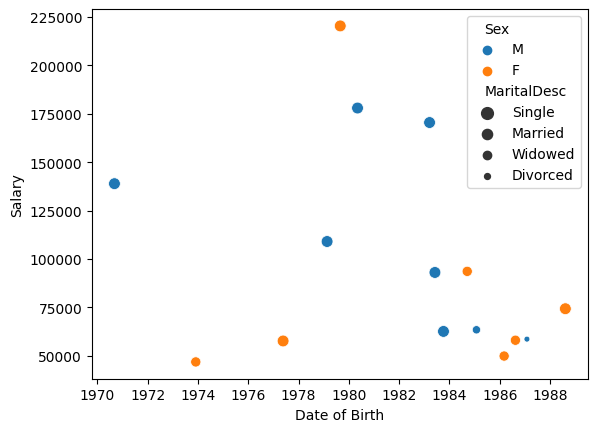

In [764]:
ax = sns.scatterplot(x= 'DOB', y= 'Salary', data= happy_high_performers,
                size= 'MaritalDesc', hue= 'Sex')
ax.set_xlabel('Date of Birth')
plt.show()

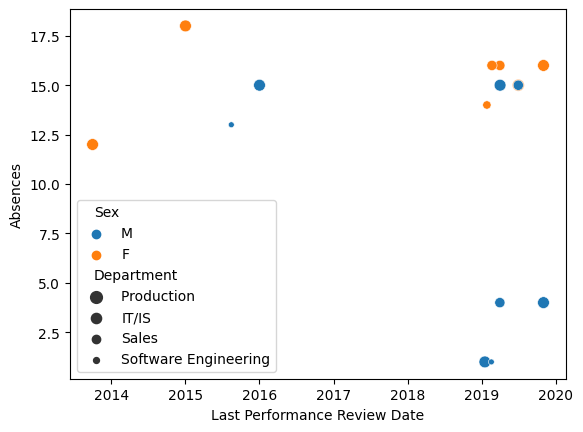

In [765]:
ax = sns.scatterplot(x= 'LastPerformanceReview_Date', y= 'Absences',
                     data= happy_high_performers, hue= 'Sex',
                     size= 'Department')
ax.set_xlabel('Last Performance Review Date')
plt.show()

In [766]:
happy_high_performers.RecruitmentSource.value_counts()

Indeed                5
LinkedIn              4
Employee Referral     3
Google Search         2
Diversity Job Fair    1
Name: RecruitmentSource, dtype: int64

In [767]:
happy_high_performers.Department.value_counts()

Production              8
IT/IS                   4
Software Engineering    2
Sales                   1
Name: Department, dtype: int64

In [768]:
df.Department.value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [769]:
# To get a feel of how recent this hiring is, let's sort the DateofHire column by date:
df_sorted_by_date_of_hire = df.sort_values(by='DateofHire')
df_sorted_by_date_of_hire['DateofHire']

282   2006-09-01
222   2007-05-11
280   2007-06-25
307   2008-02-09
3     2008-07-01
         ...    
275   2017-04-20
120   2017-04-20
240   2017-07-01
197   2017-10-02
64    2018-09-07
Name: DateofHire, Length: 311, dtype: datetime64[ns]

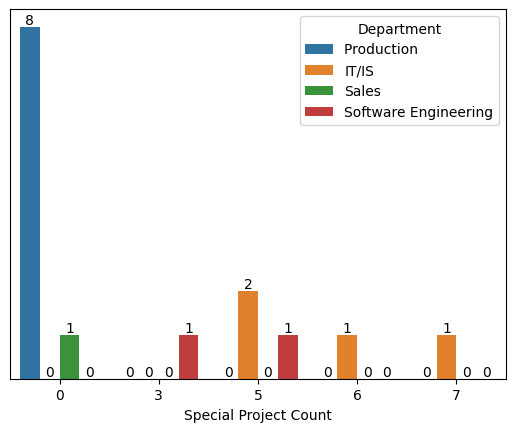

In [770]:
ax = sns.countplot(x='SpecialProjectsCount',
                   data=happy_high_performers, hue= "Department")
for i in range(4):
 ax.bar_label(ax.containers[i])
ax.set(xlabel= 'Special Project Count', ylabel=None, yticks=[])
plt.show()

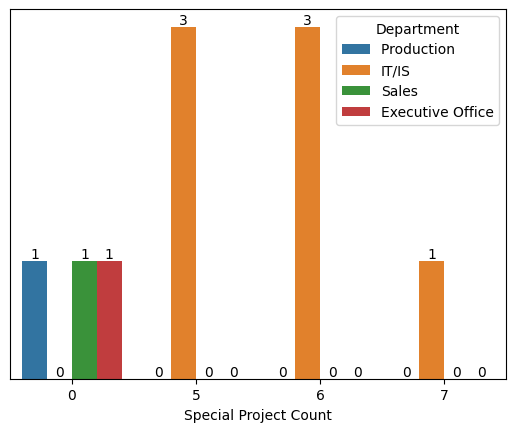

In [771]:
ax = sns.countplot(x='SpecialProjectsCount',
                   data=high_earners, hue= "Department")
for i in range(4):
 ax.bar_label(ax.containers[i])
ax.set(xlabel= 'Special Project Count', ylabel=None, yticks=[])
plt.show()

In [772]:
df.groupby(["Department"])["SpecialProjectsCount"].value_counts()

Department            SpecialProjectsCount
Admin Offices         4                         3
                      5                         2
                      0                         1
                      2                         1
                      3                         1
                      6                         1
Executive Office      0                         1
IT/IS                 6                        18
                      5                        16
                      7                        12
                      4                         2
                      8                         2
Production            0                       207
                      1                         1
                      3                         1
Sales                 0                        31
Software Engineering  4                         4
                      5                         3
                      6                         2
       

In [773]:
# Production is the only department where there has been 0 special projects
# Not correct haha. But there has only been 4 in total for the lifetime of the organization

In [774]:
# In conclusion about the happy high performance:
# All of them are US Citizens and none of them are Hispanic Latino. Just happens to be the
# case at this specific company, I don't believe we can make any meaningful inference from this
# Only one of them got hired at the company through the Diversity Job Fair
# Salary-wise most of them are below 100 000 so nothing to out of the ordinary. There are 3 of them
# between 100 000 and 200 000 and a single one above 200 000. The highest paid of these 15 are in IT
# The majority of these happy high performers have had their last performance review within the last
# year! Furthermore, a lot of them have 10+ absences! Presumably excused ones. We love to see it

In [775]:
# Now that we've looked at some of the happiest people at the company, let's look closer at these
# 14 people that quit the company due to unhappy they were

In [776]:
unhappy = df.loc[(df['TermReason'] == 'unhappy') | (df['EmpSatisfaction'] == 1)]

In [777]:
unhappy.head(5)

,Salary,Position,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,DateofHire,TermReason,Department,RecruitmentSource,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
11,47211,Production Technician I,1974-02-21,M,Married,US Citizen,Yes,2012-02-04,unhappy,Production,Diversity Job Fair,Fully Meets,3,0,2016-06-05,0,15
49,64066,Production Technician II,1981-08-31,F,Married,US Citizen,No,2011-05-16,unhappy,Production,Google Search,Fully Meets,5,0,2012-03-05,0,9
65,55722,Production Technician I,1977-10-31,M,Married,US Citizen,No,2011-05-16,unhappy,Production,Indeed,Fully Meets,4,0,2016-02-04,0,14
72,59231,Area Sales Manager,1987-05-14,F,Single,US Citizen,Yes,2012-02-20,N/A-StillEmployed,Sales,Website,PIP,1,0,2019-01-29,2,17
83,56847,Production Technician II,1989-08-25,F,Separated,US Citizen,No,2014-07-07,N/A-StillEmployed,Production,Indeed,PIP,1,0,2019-02-25,2,5


In [778]:
unhappy["Salary"].describe()

count       16.000000
mean     60935.187500
std       9812.783535
min      46430.000000
25%      55576.500000
50%      59750.500000
75%      65095.000000
max      83082.000000
Name: Salary, dtype: float64

In [779]:
unhappy.HispanicLatino.value_counts()

No     14
Yes     2
Name: HispanicLatino, dtype: int64

In [780]:
unhappy.Department.value_counts()

Production           15
Sales                 1
Name: Department, dtype: int64

In [781]:
unhappy.CitizenDesc.value_counts()

US Citizen             15
Eligible NonCitizen     1
Name: CitizenDesc, dtype: int64

In [782]:
unhappy.RecruitmentSource.value_counts()

Indeed                5
LinkedIn              4
Google Search         2
Website               2
CareerBuilder         2
Diversity Job Fair    1
Name: RecruitmentSource, dtype: int64

In [783]:
unhappy.groupby('TermReason')['EmpSatisfaction'].value_counts()

TermReason         EmpSatisfaction
N/A-StillEmployed  1                  2
unhappy            3                  5
                   4                  4
                   5                  3
                   2                  2
Name: EmpSatisfaction, dtype: int64

In [784]:
unhappy.drop(['TermReason'], axis=1, inplace=True)

In [785]:
fig = px.sunburst(unhappy,
                  path = ['Sex', 'MaritalDesc',
                          'RecruitmentSource'],
                  width=700, height=600)
fig.update_traces(textinfo="label+value")
fig.show()

In [786]:
unhappy[unhappy['DOB'] > '2000-01-01']
# This person is missing from the plot below

,Salary,Position,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,DateofHire,Department,RecruitmentSource,PerformanceScore,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
226,46430,Production Technician I,2070-09-22,F,Divorced,US Citizen,No,2012-09-24,Production,Indeed,Fully Meets,5,0,2013-02-04,0,16


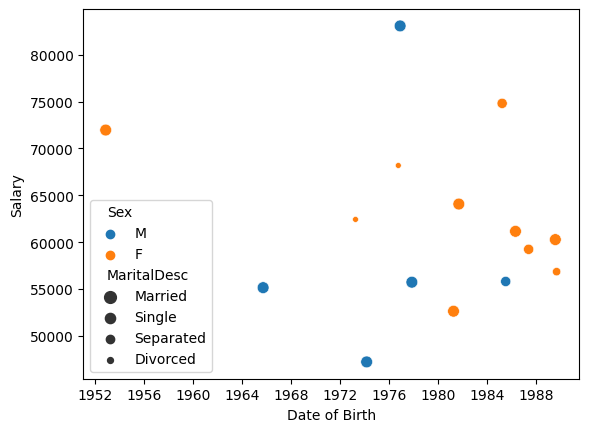

In [787]:
ax = sns.scatterplot(x= 'DOB', y= 'Salary',
                     data= unhappy[unhappy['DOB'] < '2000-01-01'],
                size= 'MaritalDesc', hue= 'Sex')
ax.set_xlabel('Date of Birth')
plt.show()

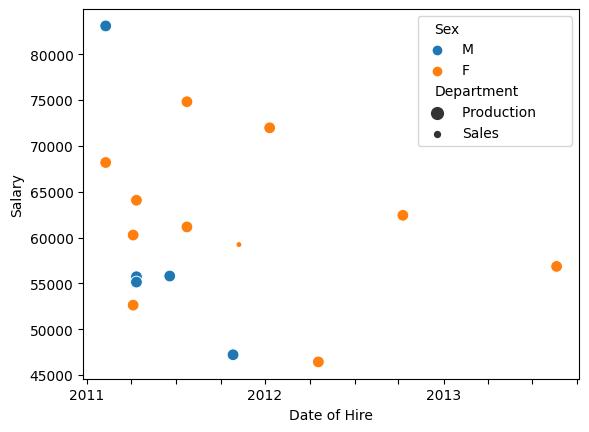

In [788]:
ax = sns.scatterplot(x= 'DateofHire', y= 'Salary', data= unhappy,
                hue= 'Sex', size= 'Department')
ax.set_xlabel('Date of Hire')
ax.set_xticklabels(['2011', None, None, None,
                   '2012', None, None, None, '2013'])
plt.show()

In [789]:
unhappy["RecruitmentSource"].value_counts()

Indeed                5
LinkedIn              4
Google Search         2
Website               2
CareerBuilder         2
Diversity Job Fair    1
Name: RecruitmentSource, dtype: int64

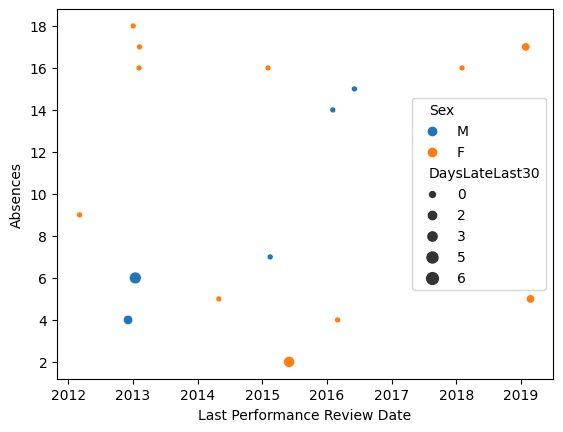

In [790]:
ax = sns.scatterplot(x= 'LastPerformanceReview_Date', y= 'Absences',
                     data= unhappy, size= 'DaysLateLast30',
                     hue= 'Sex')
ax.set_xlabel('Last Performance Review Date')
plt.show()

In [791]:
# This plot paints a pretty good picture of the stereotypical unhappy production worker:
# Hasn't had their last performance review in 6 years, has been late in the last 30 days, and doesn't
# meet their work expectations

In [792]:
# In conclusion:
# Perhaps the biggest thing to take notice to is that among these 13 unhappy people there are 2 people
# that at the latest registration of employee satisfaction scored a 5! Yet they quit the company due to
# unhappiness. Numbers aren't everything. We are human after all
# All 13 are in production. I believe this is the biggest telltale sign here. Is it possible to be a happy
# high performer in Production. Yes, one of the previous 15 are! But in general, the unhappiest people are all
# in production where as well there doesn't seem to be any special projects. Maybe to some improvements to
# prodcution? Within production, all of them are Production Technician except for one Production Manager. Having
# a manager position in and of itself will not make you happy
# The majority of these 13 have not had a single performance review in the last 4-7 years. Most of them fully meet
# their expecation, with some people needing improvement and one even exceeding their expectation. Burnout? About
# half of the people have 14+ absences and 3 of them have been late in the last 30 days
# Recruitment source is rather spread even but half of the people are either from LinkedIn or Indeed
# The majority are married, a total of 9 out of 13. Out of the 4 others, 2 of them are divorced
# All but one are non-Hispanic Latino. One is a eligible non-citizen

In [793]:
# End of project inference and conclusions:
# * The working conditions for Production needs to get better
# * They need to hire a new person responsible for entering data
# *